In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merged_df = pd.merge(ride_df, city_df, how="left", on="city")

# Display the data table for preview
merged_df.head(5)


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types
#x axis = City rides and y axis = Average fair per city 

In [3]:
#URBAN (filter out the urban types, group the rides and fares, count the number of divers per city)
urban_df = merged_df.loc[(merged_df["type"]=="Urban")]
#urban_df
urban_rides =urban_df.groupby('city')[('ride_id')].nunique()
#urban_rides
urban_fares =urban_df.groupby('city')[('fare')].mean()
#urban_fares
urban_drivers = urban_df.groupby('city')[('driver_count')].mean()
#urban_drivers

In [4]:
#Create the scatterplot: URBAN 
#plt.scatter(urban_rides, urban_fares, marker="o", facecolors="lightcoral", edgecolors="black", s=urban_drivers)

In [5]:
#RURAL (filter out the urban types, group the rides and fares, count the number of divers per city)
rural_df = merged_df.loc[(merged_df["type"]=="Rural")]
rural_rides =rural_df.groupby('city')[('ride_id')].nunique()
rural_fares =rural_df.groupby('city')[('fare')].mean()
rural_drivers = rural_df.groupby('city')[('driver_count')].count()

#Create the scatterplot: RURAL 
#plt.scatter(rural_rides, rural_fares, marker="o", facecolors="lightskyblue", edgecolors="black", s=rural_drivers)

In [6]:
#RURAL (filter out the urban types, group the rides and fares, count the number of divers per city)
sub_df = merged_df.loc[(merged_df["type"]=="Suburban")]
sub_rides =sub_df.groupby('city')[('ride_id')].nunique()
sub_fares =sub_df.groupby('city')[('fare')].mean()
sub_drivers = sub_df.groupby('city')[('driver_count')].count()

#Create the scatterplot: RURAL 
#plt.scatter(sub_rides, sub_fares, marker="o", facecolors="gold", edgecolors="black", s=sub_drivers)

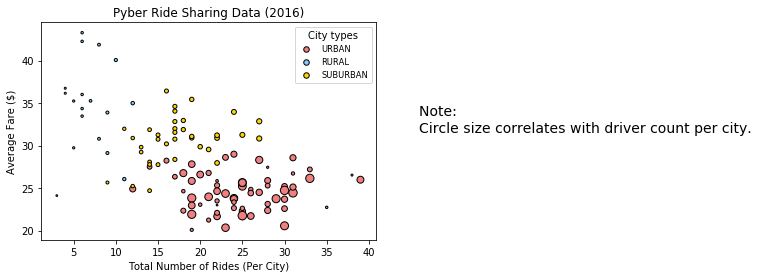

In [7]:
#Create the scatterplot: URBAN 
plt.scatter(urban_rides, urban_fares, marker="o", 
            facecolors="lightcoral", edgecolors="black", 
            s=urban_drivers, label= "URBAN")
#Create the scatterplot: RURAL 
plt.scatter(rural_rides, rural_fares, marker="o", 
            facecolors="lightskyblue", edgecolors="black", 
            s=rural_drivers, label= "RURAL")
#Create the scatterplot: RURAL 
plt.scatter(sub_rides, sub_fares, marker="o", 
            facecolors="gold", edgecolors="black", 
            s=sub_drivers, label= "SUBURBAN")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
textstr = ("Note: \nCircle size correlates with driver count per city.")
plt.gcf().text(1, 0.5, textstr, fontsize=14)

# Create a legend
lgnd = plt.legend(fontsize ="small", mode ="Expanded",
                  numpoints=1, scatterpoints=1,
                  loc ="best", title = "City types",
                 labelspacing=0.5)
lgnd.legendHandles[0]._sizes=[30]
lgnd.legendHandles[1]._sizes=[30]
lgnd.legendHandles[2]._sizes=[30]
#save the figure 
plt.savefig("pyber_fig1.png")



In [8]:
# Show plot
plt.show()

## Total Fares by City Type

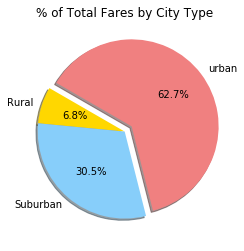

In [9]:
type_percents = 100 * merged_df.groupby(["type"]).sum()["fare"]/merged_df["fare"].sum()

#build the pie chart 
plt.pie (type_percents,
        labels= ["Rural", "Suburban", "urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
#save the figure
plt.savefig("pyber_fig2.png")
#show it up 
plt.show()

In [10]:
## Total Rides by City Type

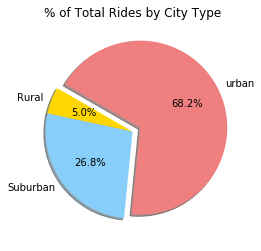

In [11]:
# Calculate Ride Percents
#unique_rides = merged_df.groupby["ride_id "].nunique
ride_percents = 100 * merged_df.groupby(["type"]).sum()["ride_id"]/merged_df["ride_id"].sum()

#build the pie chart 
plt.pie (ride_percents,
        labels= ["Rural", "Suburban", "urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("pyber_fig3.png")

## Total Drivers by City Type

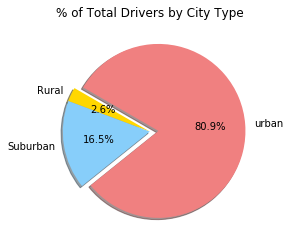

In [12]:
# Calculate Driver Percents
droped_df =merged_df.drop_duplicates('city')
ride_percents = 100 * droped_df.groupby(["type"]).sum()["driver_count"]/droped_df["driver_count"].sum()

#build the pie chart 
plt.pie (ride_percents,
        labels= ["Rural", "Suburban", "urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("pyber_fig4.png")